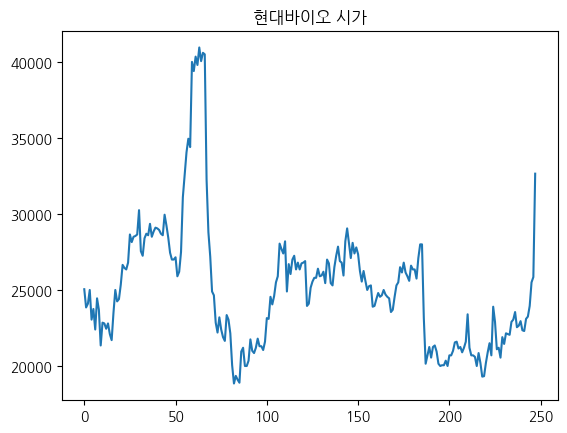

In [7]:
# ARIMA의 (p, d, q) 파라미터 값 선정을 위한 분석 및 예측
import pandas as pd
import numpy as np
import os
import itertools
from tqdm import tqdm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('./data/현대바이오.csv')
# 데이터 순서대로 분할
data1, data2 = np.split(df, [int(len(df)*0.7)])
train_data = data1['시가']

import matplotlib as mpl
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

plt.title('현대바이오 시가')
plt.plot(df['시가'])

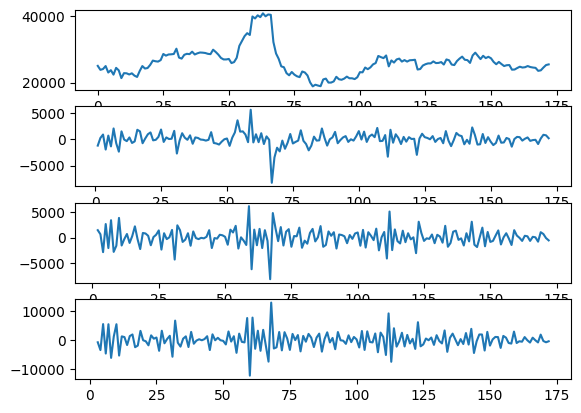

In [2]:
# 차분 그래프 확인
plt.subplot(4,1,1)
plt.plot(train_data)
plt.subplot(4,1,2)
plt.plot(train_data.diff()) # 1차 차분
plt.subplot(4,1,3)
plt.plot(train_data.diff().diff()) # 2차 차분
plt.subplot(4,1,4)
plt.plot(train_data.diff().diff().diff()) # 3차 차분

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


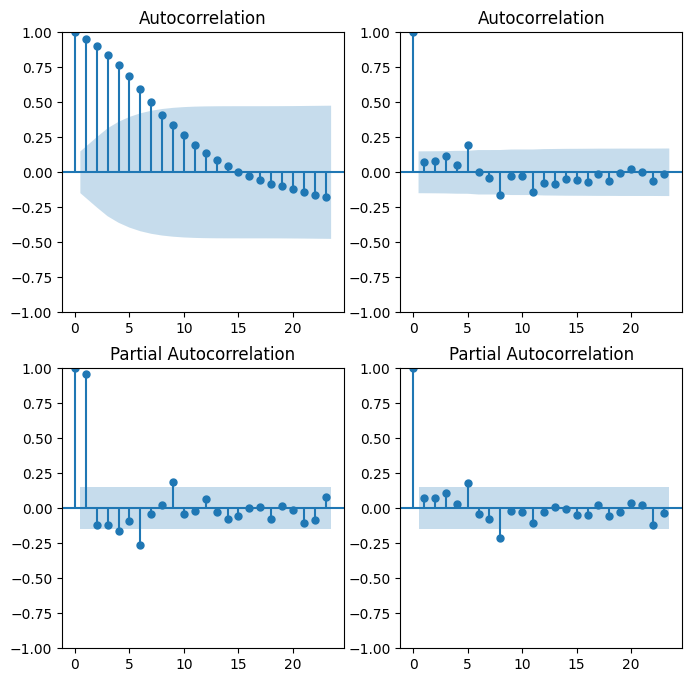

In [3]:
# acf, pacf 그래프 확인
fig, axe = plt.subplots(2,2, figsize=(8,8))

# acf의 그래프는 천천히 떨어지고
# pacf의 그래프는 처음부터 급격히 감소하므로
# AR 특성이 뚜렷하다
plot_acf(train_data, axe[0,0])
plot_pacf(train_data, axe[1,0])

# 1회차 차분한 결과
# 천천히 감소하는 그래프가 아니므로
# MA 특성이 없다고 판단
plot_acf(train_data.diff().dropna(), axe[0,1])
plot_pacf(train_data.diff().dropna(), axe[1,1])
plt.show()

In [4]:
# p, d, q를 다 넣어서 aic의 값이 가장 작은 p,d,q 조합을 구함
p = range(0,10)
# d = range(0,20)
q = range(0,10) # acf, pacf를 확인한 결과 MA모형은 선택하지 않을 수 있음
pdq = list(itertools.product(p, [2], q))

aic = []
for i in pdq:
    model = ARIMA(train_data, order = i)
    model_fit = model.fit()
    aic.append(model_fit.aic)

optimal = (pdq[aic.index(min(aic))], min(aic))
print(optimal) # (3, 2, 2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sta

((3, 2, 2), 2972.264029166633)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  173
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1480.132
Date:                Fri, 16 Jun 2023   AIC                           2972.264
Time:                        03:01:43   BIC                           2991.114
Sample:                             0   HQIC                          2979.913
                                - 173                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4917      0.114     -4.306      0.000      -0.715      -0.268
ar.L2          0.2970      0.081      3.664      0.000       0.138       0.456
ar.L3          0.1313      0.052      2.504      0.0

<AxesSubplot:title={'center':'Density'}, ylabel='Density'>

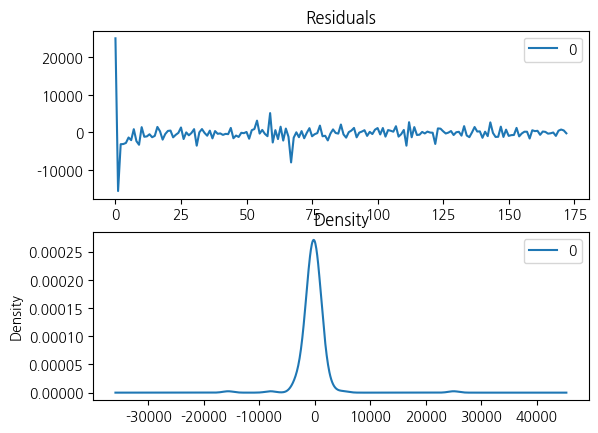

In [10]:
# 최소의 aic값인 p, d, q로 모델 fit
model = ARIMA(train_data.values, order=(3, 2, 2))
fit = model.fit()
print(fit.summary())
residuals = pd.DataFrame(fit.resid)
fig, ax = plt.subplots(2,1)
residuals.plot(title="Residuals", ax=ax[0]) # 잔차 그래프
# 분산 확인
residuals.plot(kind='kde', title='Density', ax=ax[1]) # 잔차 커널밀도 그래프

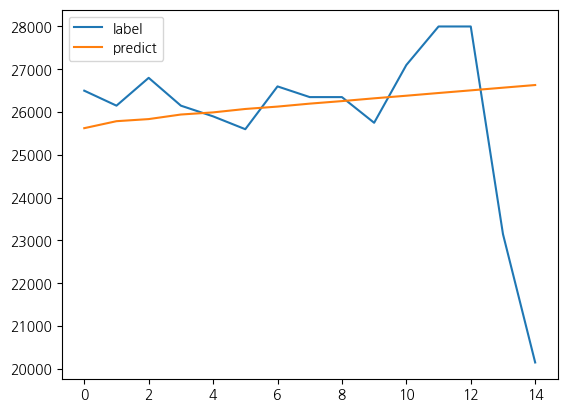

In [13]:
# 예측
result = fit.forecast(15, alpha=0.05)

plt.plot(data2.iloc[:15, 1].values, label="label")
plt.plot(result, label="predict")
plt.legend()